Library Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [12]:
df = pd.read_csv('IMDB-Movie-Data.csv')

def assign_rating_cluster(rating):
    if rating >= 8:
        return 'Top Rate'
    elif 6 <= rating < 8:
        return 'Average Rate'
    else:
        return 'Low Rate'

df['RatingCluster'] = df['Rating'].apply(assign_rating_cluster)

#we want to focus on the rating feature
features = df[['Rating']].values
#print(df.head())

#---------------------------------------------------------------------------------
def centroid_initialise(k, data):
    np.random.seed(40)
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    return data[random_indices]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
    return np.argmin(distances, axis=0)

def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):

    centroids = centroid_initialise(k, data)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# k=3 because we have 3 clusters Top, Average, Low
k = 3
labels, centroids = kmeans(features, k)

df['Cluster'] = labels


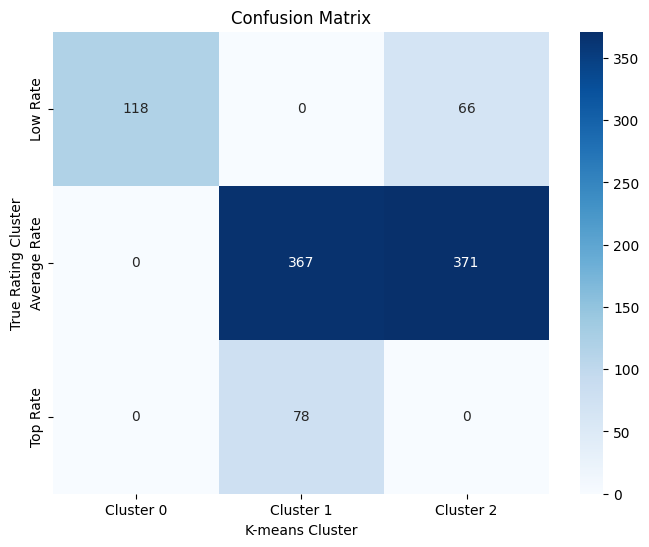

In [13]:

rating_map = {'Low Rate': 0, 'Average Rate': 1, 'Top Rate': 2}
df['RatingClusterNum'] = df['RatingCluster'].map(rating_map)
# Generate confusion matrix
cm = confusion_matrix(df['RatingClusterNum'], df['Cluster'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Low Rate', 'Average Rate', 'Top Rate'])
plt.ylabel('True Rating Cluster')
plt.xlabel('K-means Cluster')
plt.title('Confusion Matrix')
plt.show()


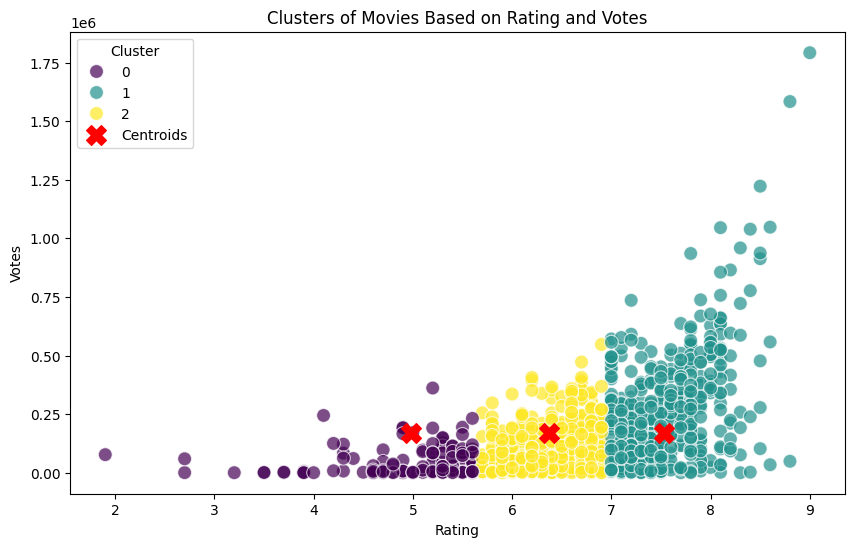

In [15]:

# For 2D Scatter Plot: Rating vs. Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Rating'], y=df['Votes'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], [df['Votes'].mean()] * len(centroids), c='red', s=200, marker='X', label='Centroids')
plt.title('Clusters of Movies Based on Rating and Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.legend(title="Cluster")
plt.show()

